In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

from itertools import product
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # Import Naive Bayes Classifier
from sklearn.svm import SVC, LinearSVC # Import SVM Classifier
from sklearn.neighbors import KNeighborsClassifier # Import KNN Classifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from pprint import pprint
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from prettytable import PrettyTable
from scipy import stats
from matplotlib.pyplot import pie, axis, show
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, SelectFromModel, RFE
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from helpers import train_model, plot_conf_mat

random.seed(0)

In [2]:
X_cs_10 = np.load('npy_data/X_combinedSampling_10Features_task1.npy')
y_cs_10 = np.load('npy_data/y_combinedSampling_10Features_task1.npy')
print('X_cs_10.shape, y_cs_10.shape', X_cs_10.shape, y_cs_10.shape)

X_cs_15 = np.load('npy_data/X_combinedSampling_15Features_task1.npy')
y_cs_15 = np.load('npy_data/y_combinedSampling_15Features_task1.npy')
print('X_cs_15.shape, y_cs_15.shape', X_cs_15.shape, y_cs_15.shape)

X_cs_25 = np.load('npy_data/X_combinedSampling_25Features_task1.npy')
y_cs_25 = np.load('npy_data/y_combinedSampling_25Features_task1.npy')
print('X_cs_25.shape, y_cs_25.shape', X_cs_25.shape, y_cs_25.shape)

X_cs_all = np.load('npy_data/X_combinedSampling_AllFeatures_task1.npy')
y_cs_all = np.load('npy_data/y_combinedSampling_AllFeatures_task1.npy')
print('X_cs_all.shape, y_cs_all.shape', X_cs_all.shape, y_cs_all.shape)

X_cs_10.shape, y_cs_10.shape (14517, 10) (14517,)
X_cs_15.shape, y_cs_15.shape (27209, 15) (27209,)
X_cs_25.shape, y_cs_25.shape (64753, 25) (64753,)
X_cs_all.shape, y_cs_all.shape (73171, 45) (73171,)


In [3]:
kfold = StratifiedKFold(10, random_state=False, shuffle=True)

folds_10 = kfold.split(X_cs_10, y_cs_10)
folds_10 = [(train, test) for train, test in folds_10]

folds_15 = kfold.split(X_cs_15, y_cs_15)
folds_15 = [(train, test) for train, test in folds_15]

folds_25 = kfold.split(X_cs_25, y_cs_25)
folds_25 = [(train, test) for train, test in folds_25]

folds_all = kfold.split(X_cs_all, y_cs_all)
folds_all = [(train, test) for train, test in folds_all]

In [4]:
data_classes_10  = []
data_classes_15  = []
data_classes_25  = []
data_classes_all = []

for i in range(3):
    data_classes_10.append(len(y_cs_10[y_cs_10==i]))
for i in range(3):
    data_classes_15.append(len(y_cs_15[y_cs_15==i]))
for i in range(3):
    data_classes_25.append(len(y_cs_25[y_cs_25==i]))
for i in range(3):
    data_classes_all.append(len(y_cs_all[y_cs_all==i]))

----------------10 Selected Features----------------
+---------------+-----------------------+
|    XGBoost    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   1.7658999999999998  |
|    Accuracy   |   0.9268446953084508  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |     Class - No     | Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.8460495891984031 | 0.9374682204453597 | 0.9708360772266351 |
|     Recall     | 0.8755797434048042 | 0.9282102493979492 | 0.9627631075392269 |
|  Specificity   | 0.9580696257615319 | 0.9343338444035926 | 0.9888439735407767 |
|    F1-score    | 0.8604708370347849 | 0.9327685924832227 | 0.9666799563484471 |
+----------------+--------------------+--------------------+--------------------+
+-----------+--------+-----------+-----

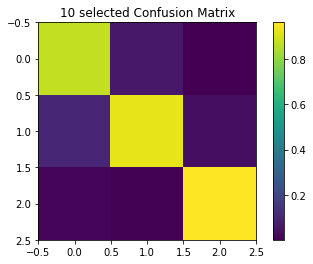

----------------------------------------------------
----------------15 Selected Features----------------
+---------------+-----------------------+
|    XGBoost    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         5.0927        |
|    Accuracy   |   0.7829762117084982  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |     Class - No     | Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7942628522361683 | 0.7051955164013831 | 0.8204984805638649 |
|     Recall     | 0.8369529130549228 | 0.5876836714154721 | 0.8793069555811004 |
|  Specificity   | 0.8419313850063531 | 0.9096397091156418 | 0.9137881455731321 |
|    F1-score    | 0.8150052243600419 | 0.6410047251744314 | 0.8488469244193544 |
+----------------+--------------------+--------------------+--------

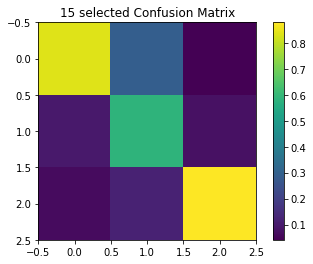

----------------------------------------------------
----------------25 Selected Features----------------
+---------------+-----------------------+
|    XGBoost    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   25.715600000000002  |
|    Accuracy   |   0.7116427247860231  |
+---------------+-----------------------+
+----------------+--------------------+---------------------+--------------------+
| Metric / Class |     Class - No     |  Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+---------------------+--------------------+
|   Percision    | 0.7303496675311969 |  0.5497406627299454 | 0.7186461894445463 |
|     Recall     | 0.9214744289653686 | 0.21681599877050756 | 0.6611557015647964 |
|  Specificity   | 0.4949939077181954 |  0.9449085040624867 | 0.9484221597963958 |
|    F1-score    | 0.8148477174589287 | 0.31083783760436556 | 0.6886084491001025 |
+----------------+--------------------+---------------------+

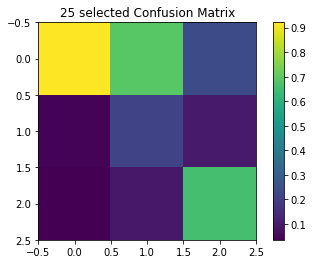

----------------------------------------------------
---------------All Selected Features----------------
+---------------+-----------------------+
|    XGBoost    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   56.938900000000004  |
|    Accuracy   |   0.7133290009678817  |
+---------------+-----------------------+
+----------------+---------------------+---------------------+--------------------+
| Metric / Class |      Class - No     |  Class - > 30 days  | Class - < 30 days  |
+----------------+---------------------+---------------------+--------------------+
|   Percision    |  0.7285180112839515 |  0.5310583814059805 | 0.7154249521067448 |
|     Recall     |  0.9446930236545417 |  0.1590945755192579 |  0.57169841009222  |
|  Specificity   | 0.37879738639358695 |  0.9571590501349438 | 0.9665862948339479 |
|    F1-score    |  0.8226367396749449 | 0.24477425750287388 | 0.6353384720117788 |
+----------------+---------------------+--------------

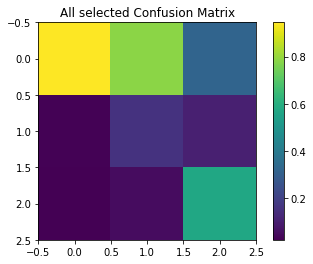

In [5]:
tables, xgboost_metrics_10 = train_model(model_name='XGBoost', 
                                         X=X_cs_10, y=y_cs_10, folds=folds_10, 
                                         data_classes=data_classes_10)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------10 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '10 selected')

print('----------------------------------------------------')

tables, xgboost_metrics_15 = train_model(model_name='XGBoost', 
                                         X=X_cs_15, y=y_cs_15, folds=folds_15, 
                                         data_classes=data_classes_15)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')

print('----------------------------------------------------')

tables, xgboost_metrics_25 = train_model(model_name='XGBoost', 
                                         X=X_cs_25, y=y_cs_25, folds=folds_25, 
                                         data_classes=data_classes_25)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------25 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '25 selected')

print('----------------------------------------------------')

tables, xgboost_metrics_all = train_model(model_name='XGBoost', 
                                          X=X_cs_all, y=y_cs_all, folds=folds_all, 
                                          data_classes=data_classes_all)
table1, table2, conf_mat, conf_mat_norm = tables
print('---------------All Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'All selected')

----------------10 Selected Features----------------
+---------------+-----------------------+
|    AdaBoost   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.2133        |
|    Accuracy   |   0.762209258172857   |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |     Class - No     | Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+--------------------+--------------------+
|   Percision    |  0.71735547441378  | 0.731950180489781  | 0.923410795319558  |
|     Recall     | 0.732619718925535  | 0.8711473238799703 | 0.5825308939175092 |
|  Specificity   | 0.924053808604836  | 0.6617528305780972 | 0.9815016482436926 |
|    F1-score    | 0.7247401815917249 | 0.795445947500125  | 0.7140662928192533 |
+----------------+--------------------+--------------------+--------------------+
+-----------+--------+-----------+-----

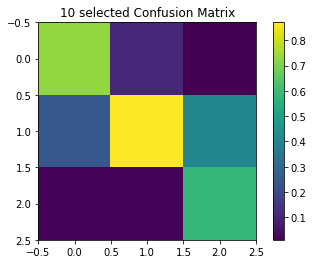

----------------------------------------------------
----------------15 Selected Features----------------
+---------------+-----------------------+
|    AdaBoost   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |  0.49539999999999995  |
|    Accuracy   |   0.7189898691008928  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |     Class - No     | Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7525174701934887 | 0.597651752047326  | 0.7660787049406583 |
|     Recall     | 0.727964520845791  | 0.545897352746032  | 0.8573291043068849 |
|  Specificity   | 0.8254129606099111 | 0.8645858749115567 | 0.8826566303941661 |
|    F1-score    | 0.7398572751909921 | 0.5703024069103539 | 0.8090937290078323 |
+----------------+--------------------+--------------------+--------

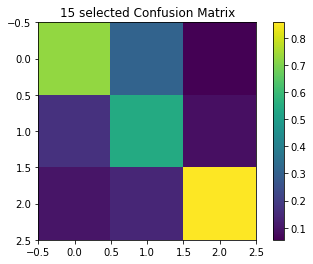

----------------------------------------------------
----------------25 Selected Features----------------
+---------------+-----------------------+
|    AdaBoost   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   2.0784000000000002  |
|    Accuracy   |   0.6784704891956281  |
+---------------+-----------------------+
+----------------+---------------------+---------------------+--------------------+
| Metric / Class |      Class - No     |  Class - > 30 days  | Class - < 30 days  |
+----------------+---------------------+---------------------+--------------------+
|   Percision    |  0.6972407950070315 | 0.49585469158747425 | 0.6772945131893074 |
|     Recall     |  0.9128671729225196 | 0.16710258150723822 | 0.5631735973026715 |
|  Specificity   | 0.41154920882764123 |  0.9475778425136043 | 0.9464777462218654 |
|    F1-score    |  0.7905921629586885 | 0.24965554151514105 | 0.6147706608474575 |
+----------------+---------------------+--------------

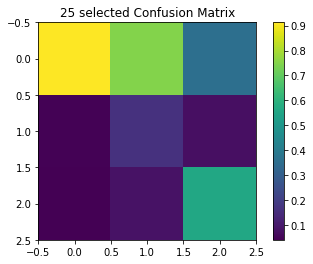

----------------------------------------------------
---------------All Selected Features----------------
+---------------+-----------------------+
|    AdaBoost   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   4.316599999999999   |
|    Accuracy   |   0.6871984184905164  |
+---------------+-----------------------+
+----------------+---------------------+---------------------+--------------------+
| Metric / Class |      Class - No     |  Class - > 30 days  | Class - < 30 days  |
+----------------+---------------------+---------------------+--------------------+
|   Percision    |  0.7011122111967947 |  0.4830272374483953 | 0.6688860612589971 |
|     Recall     |  0.9450999309145638 | 0.10366619842026654 | 0.4667338249915624 |
|  Specificity   | 0.28906633131361936 |  0.9660410946594403 | 0.9660377669010518 |
|    F1-score    |  0.8050206963477894 | 0.17065038508268288 | 0.5496145522856821 |
+----------------+---------------------+--------------

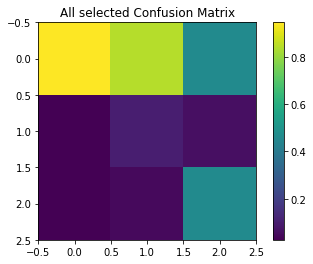

In [6]:
tables, adaboost_metrics_10 = train_model(model_name='AdaBoost', 
                                         X=X_cs_10, y=y_cs_10, folds=folds_10, 
                                         data_classes=data_classes_10)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------10 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '10 selected')

print('----------------------------------------------------')

tables, adaboost_metrics_15 = train_model(model_name='AdaBoost', 
                                         X=X_cs_15, y=y_cs_15, folds=folds_15, 
                                         data_classes=data_classes_15)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')

print('----------------------------------------------------')

tables, adaboost_metrics_25 = train_model(model_name='AdaBoost', 
                                         X=X_cs_25, y=y_cs_25, folds=folds_25, 
                                         data_classes=data_classes_25)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------25 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '25 selected')

print('----------------------------------------------------')

tables, adaboost_metrics_all = train_model(model_name='AdaBoost', 
                                          X=X_cs_all, y=y_cs_all, folds=folds_all, 
                                          data_classes=data_classes_all)
table1, table2, conf_mat, conf_mat_norm = tables
print('---------------All Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'All selected')

----------------10 Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.3931        |
|    Accuracy   |   0.9911828168281398  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |     Class - No     | Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.9736405367661701 | 0.9946180403719611 | 0.9982667034053586 |
|     Recall     | 0.9864336764802308 | 0.9890159386428646 | 0.9987586879498289 |
|  Specificity   | 0.9929534188519318 | 0.9943266389636222 | 0.9993325158820833 |
|    F1-score    | 0.9799637064852613 | 0.9918028166607721 | 0.998510853037517  |
+----------------+--------------------+--------------------+--------------------+
+-----------+--------+-----------+-----

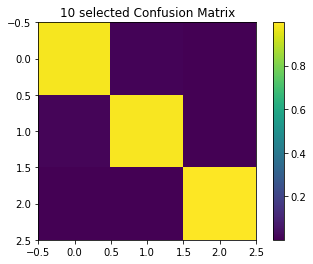

----------------------------------------------------
----------------15 Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   1.1259000000000001  |
|    Accuracy   |   0.9701936058326309  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |     Class - No     | Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.9518308733773917 | 0.975353094932523  | 0.9920939529178489 |
|     Recall     | 0.9864851931816971 | 0.9292547283042218 | 0.983606214748306  |
|  Specificity   | 0.9635959339263025 | 0.9913511734784974 | 0.9964876915063468 |
|    F1-score    | 0.9688376976249137 | 0.9517242967998383 | 0.9878268880135218 |
+----------------+--------------------+--------------------+--------

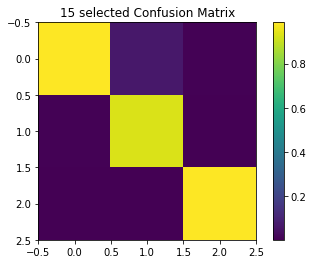

----------------------------------------------------
----------------25 Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         4.9796        |
|    Accuracy   |   0.9165135445160152  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |     Class - No     | Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.9068686998338983 | 0.9363900217006982 | 0.9322733157495419 |
|     Recall     | 0.9895316376051999 | 0.7861908360121753 | 0.8393629290222183 |
|  Specificity   | 0.8491469039168118 | 0.9834564186635516 | 0.9878509291844167 |
|    F1-score    | 0.9463958788987951 | 0.8547142364183442 | 0.8833626410179953 |
+----------------+--------------------+--------------------+--------

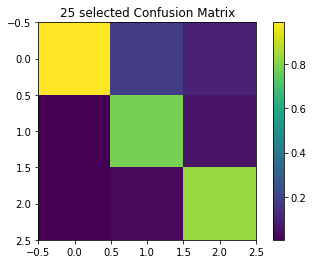

----------------------------------------------------
---------------All Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         6.8299        |
|    Accuracy   |   0.888699021544283   |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |     Class - No     | Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.8721979557359338 | 0.9364312664779494 | 0.9269813380678824 |
|     Recall     | 0.9961244124643513 | 0.7099934718932535 | 0.6793324530917914 |
|  Specificity   | 0.7424056840970868 | 0.9853035146216473 | 0.9921323786967482 |
|    F1-score    | 0.930045812872357  | 0.8076127837207651 | 0.7839279641992076 |
+----------------+--------------------+--------------------+--------

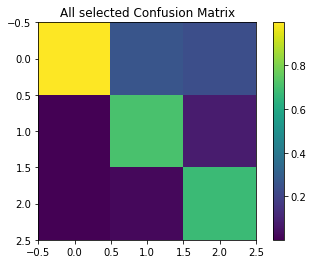

In [7]:
tables, xtrees_metrics_10 = train_model(model_name='XTrees', 
                                         X=X_cs_10, y=y_cs_10, folds=folds_10, 
                                         data_classes=data_classes_10)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------10 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '10 selected')

print('----------------------------------------------------')

tables, xtrees_metrics_15 = train_model(model_name='XTrees', 
                                         X=X_cs_15, y=y_cs_15, folds=folds_15, 
                                         data_classes=data_classes_15)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')

print('----------------------------------------------------')

tables, xtrees_metrics_25 = train_model(model_name='XTrees', 
                                         X=X_cs_25, y=y_cs_25, folds=folds_25, 
                                         data_classes=data_classes_25)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------25 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '25 selected')

print('----------------------------------------------------')

tables, xtrees_metrics_all = train_model(model_name='XTrees', 
                                          X=X_cs_all, y=y_cs_all, folds=folds_all, 
                                          data_classes=data_classes_all)
table1, table2, conf_mat, conf_mat_norm = tables
print('---------------All Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'All selected')

----------------10 Selected Features----------------
+---------------+-----------------------+
|      KNN      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.1878        |
|    Accuracy   |   0.9626638700772526  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |     Class - No     | Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.921130636886671  | 0.9697056380403399 | 0.9810185200182124 |
|     Recall     | 0.9199200052455577 | 0.9670505076606695 | 0.9865955581892027 |
|  Specificity   | 0.9792092178453855 | 0.9679446499608222 | 0.9926577656655923 |
|    F1-score    | 0.9203875858442583 |  0.96835022488835  | 0.9837808331619478 |
+----------------+--------------------+--------------------+--------------------+
+-----------+--------+-----------+-----

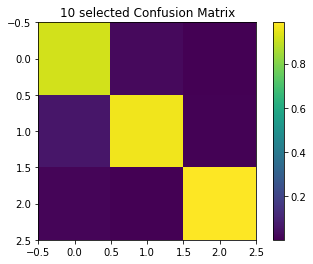

----------------------------------------------------
----------------15 Selected Features----------------
+---------------+-----------------------+
|      KNN      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.7304        |
|    Accuracy   |   0.9054355692111467  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |     Class - No     | Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.878016617965806  | 0.9020017272358292 | 0.9486169068582386 |
|     Recall     | 0.9307703836246312 | 0.8329741909511774 | 0.9339497996108015 |
|  Specificity   |  0.90571791613723  | 0.9666618600647118 | 0.9773297249555556 |
|    F1-score    | 0.903598403159578  | 0.8660412269915139 | 0.9412190930284421 |
+----------------+--------------------+--------------------+--------

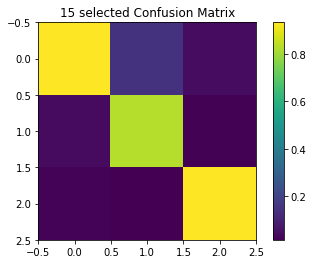

----------------------------------------------------
----------------25 Selected Features----------------
+---------------+-----------------------+
|      KNN      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   4.585500000000001   |
|    Accuracy   |   0.8336757138326009  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |     Class - No     | Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.8285062717811325 | 0.8326159856831004 | 0.8664334099706703 |
|     Recall     | 0.9677160859941791 | 0.6511629803238517 | 0.6113253220368289 |
|  Specificity   | 0.702628865964207  | 0.9594499977094315 | 0.9812207919161986 |
|    F1-score    | 0.8927067776290183 | 0.730730778881931  | 0.7168264571504145 |
+----------------+--------------------+--------------------+--------

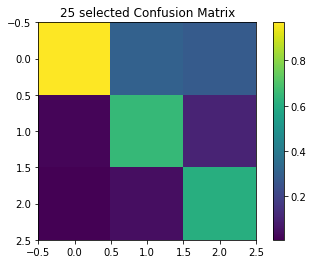

----------------------------------------------------


In [ ]:
tables, knn_metrics_10 = train_model(model_name='KNN', 
                                         X=X_cs_10, y=y_cs_10, folds=folds_10, 
                                         data_classes=data_classes_10)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------10 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '10 selected')

print('----------------------------------------------------')

tables, knn_metrics_15 = train_model(model_name='KNN', 
                                         X=X_cs_15, y=y_cs_15, folds=folds_15, 
                                         data_classes=data_classes_15)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')

print('----------------------------------------------------')

tables, knn_metrics_25 = train_model(model_name='KNN', 
                                         X=X_cs_25, y=y_cs_25, folds=folds_25, 
                                         data_classes=data_classes_25)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------25 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '25 selected')

print('----------------------------------------------------')

tables, knn_metrics_all = train_model(model_name='KNN', 
                                          X=X_cs_all, y=y_cs_all, folds=folds_all, 
                                          data_classes=data_classes_all)
table1, table2, conf_mat, conf_mat_norm = tables
print('---------------All Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'All selected')

In [ ]:
tables, dt_metrics_10 = train_model(model_name='DT', 
                                         X=X_cs_10, y=y_cs_10, folds=folds_10, 
                                         data_classes=data_classes_10)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------10 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '10 selected')

print('----------------------------------------------------')

tables, dt_metrics_15 = train_model(model_name='DT', 
                                         X=X_cs_15, y=y_cs_15, folds=folds_15, 
                                         data_classes=data_classes_15)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')

print('----------------------------------------------------')

tables, dt_metrics_25 = train_model(model_name='DT', 
                                         X=X_cs_25, y=y_cs_25, folds=folds_25, 
                                         data_classes=data_classes_25)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------25 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '25 selected')

print('----------------------------------------------------')

tables, dt_metrics_all = train_model(model_name='DT', 
                                          X=X_cs_all, y=y_cs_all, folds=folds_all, 
                                          data_classes=data_classes_all)
table1, table2, conf_mat, conf_mat_norm = tables
print('---------------All Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'All selected')